In [7]:
from dq_agent import Agent
import numpy as np
import gym

In [8]:
if __name__ == '__main__':
    env = gym.make('CartPole-v1')
    best_score = -np.inf
    load_checkpoint = False
    record_agent = False
    n_games = 250
    agent = Agent(gamma=0.99, epsilon=1, lr=0.0001, input_dims=(env.observation_space.shape), 
                  n_actions=env.action_space.n, mem_size=50000, eps_min=0.1, batch_size=32, replace=1000, 
                  eps_dec=1e-5)

    n_steps = 0
    scores, eps_history, steps_array = [], [], []

    for i in range(n_games):
        done = False
        observation = env.reset()

        score = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward

            if not load_checkpoint:
                agent.store_transition(observation, action,
                                       reward, observation_, done)
                agent.learn()
            observation = observation_
            n_steps += 1
        scores.append(score)
        steps_array.append(n_steps)

        avg_score = np.mean(scores[-100:])
        
        print(f'episode {i} score {score:.1f} avg score {avg_score:.1f} best score {best_score:.1f} epsilon {agent.epsilon:.2f} steps {n_steps}')
 

        if score > best_score:
            best_score = score

        eps_history.append(agent.epsilon)

    x = [i+1 for i in range(len(scores))]

episode 0 score 49.0 avg score 49.0 best score -inf epsilon 1.00 steps 49
episode 1 score 16.0 avg score 32.5 best score 49.0 epsilon 1.00 steps 65
episode 2 score 27.0 avg score 30.7 best score 49.0 epsilon 1.00 steps 92
episode 3 score 22.0 avg score 28.5 best score 49.0 epsilon 1.00 steps 114
episode 4 score 23.0 avg score 27.4 best score 49.0 epsilon 1.00 steps 137
episode 5 score 9.0 avg score 24.3 best score 49.0 epsilon 1.00 steps 146
episode 6 score 24.0 avg score 24.3 best score 49.0 epsilon 1.00 steps 170
episode 7 score 9.0 avg score 22.4 best score 49.0 epsilon 1.00 steps 179
episode 8 score 19.0 avg score 22.0 best score 49.0 epsilon 1.00 steps 198
episode 9 score 9.0 avg score 20.7 best score 49.0 epsilon 1.00 steps 207
episode 10 score 24.0 avg score 21.0 best score 49.0 epsilon 1.00 steps 231
episode 11 score 14.0 avg score 20.4 best score 49.0 epsilon 1.00 steps 245
episode 12 score 32.0 avg score 21.3 best score 49.0 epsilon 1.00 steps 277
episode 13 score 11.0 avg sc

In [9]:
import matplotlib.pyplot as plt

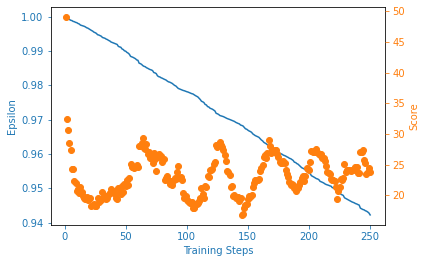

In [10]:
    fig=plt.figure()
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(x, eps_history, color="C0")
    ax.set_xlabel("Training Steps", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
	    running_avg[t] = np.mean(scores[max(0, t-20):(t+1)])

    ax2.scatter(x, running_avg, color="C1")
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Score', color="C1")
    ax2.yaxis.set_label_position('right')
    ax2.tick_params(axis='y', colors="C1")
